In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1=pd.read_csv('Desktop/Allproject/Medical_Insurance/insurance.csv')
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df1.shape

(1338, 7)

In [3]:
df1.groupby('sex')['sex'].agg('count')

sex
female    662
male      676
Name: sex, dtype: int64

In [4]:
df1['bmi'].dtype
df1['region'].dtype

dtype('O')

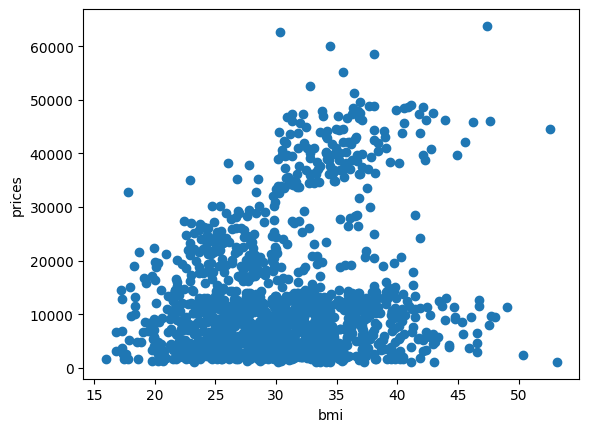

In [5]:
bmi=df1['bmi']
charges=df1['charges']

plt.scatter(bmi, charges)       # Line plot
plt.xlabel("bmi")
plt.ylabel("prices")
plt.legend
plt.show()

In [6]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
df1['region'].dtype

dtype('O')

In [9]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df1['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [11]:
def categorizeData(age):
    if 0 <= age <= 10:
        return '0-10'
    elif 11 <= age <= 20:
        return '11-20'
    elif 21 <= age <= 30:
        return '21-30'
    elif 31 <= age <= 40:
        return '31-40'
    elif 41 <= age <= 50:
        return '41-50'
    else:
        return '50+'

In [12]:

df1['new_age']=df1['age'].apply(categorizeData)
df1


,age,sex,bmi,children,smoker,region,charges,new_age
0,19,female,27.900,0,yes,southwest,16884.92400,11-20
1,18,male,33.770,1,no,southeast,1725.55230,11-20
2,28,male,33.000,3,no,southeast,4449.46200,21-30
3,33,male,22.705,0,no,northwest,21984.47061,31-40
4,32,male,28.880,0,no,northwest,3866.85520,31-40
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,41-50
1334,18,female,31.920,0,no,northeast,2205.98080,11-20
1335,18,female,36.850,0,no,southeast,1629.83350,11-20
1336,21,female,25.800,0,no,southwest,2007.94500,21-30


In [13]:
# df1['new_age'].dtype
dfx=df1.drop('age',axis='columns')
dfx

,sex,bmi,children,smoker,region,charges,new_age
0,female,27.900,0,yes,southwest,16884.92400,11-20
1,male,33.770,1,no,southeast,1725.55230,11-20
2,male,33.000,3,no,southeast,4449.46200,21-30
3,male,22.705,0,no,northwest,21984.47061,31-40
4,male,28.880,0,no,northwest,3866.85520,31-40
...,...,...,...,...,...,...,...
1333,male,30.970,3,no,northwest,10600.54830,41-50
1334,female,31.920,0,no,northeast,2205.98080,11-20
1335,female,36.850,0,no,southeast,1629.83350,11-20
1336,female,25.800,0,no,southwest,2007.94500,21-30


In [14]:
dummies=pd.get_dummies(dfx,columns=['sex','smoker','region','new_age']).mul(1)
df2=dummies

In [15]:
df2

,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,new_age_11-20,new_age_21-30,new_age_31-40,new_age_41-50,new_age_50+
0,27.900,0,16884.92400,1,0,0,1,0,0,0,1,1,0,0,0,0
1,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1,0,0,0,0
2,33.000,3,4449.46200,0,1,1,0,0,0,1,0,0,1,0,0,0
3,22.705,0,21984.47061,0,1,1,0,0,1,0,0,0,0,1,0,0
4,28.880,0,3866.85520,0,1,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,30.970,3,10600.54830,0,1,1,0,0,1,0,0,0,0,0,1,0
1334,31.920,0,2205.98080,1,0,1,0,1,0,0,0,1,0,0,0,0
1335,36.850,0,1629.83350,1,0,1,0,0,0,1,0,1,0,0,0,0
1336,25.800,0,2007.94500,1,0,1,0,0,0,0,1,0,1,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [17]:
x=df2.drop('charges',axis='columns')
y=df2['charges']
y.loc[20]

np.float64(13228.84695)

In [18]:
x

,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,new_age_11-20,new_age_21-30,new_age_31-40,new_age_41-50,new_age_50+
0,27.900,0,1,0,0,1,0,0,0,1,1,0,0,0,0
1,33.770,1,0,1,1,0,0,0,1,0,1,0,0,0,0
2,33.000,3,0,1,1,0,0,0,1,0,0,1,0,0,0
3,22.705,0,0,1,1,0,0,1,0,0,0,0,1,0,0
4,28.880,0,0,1,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,30.970,3,0,1,1,0,0,1,0,0,0,0,0,1,0
1334,31.920,0,1,0,1,0,1,0,0,0,1,0,0,0,0
1335,36.850,0,1,0,1,0,0,0,1,0,1,0,0,0,0
1336,25.800,0,1,0,1,0,0,0,0,1,0,1,0,0,0


In [19]:
model=LinearRegression()
X_train,X_test,Y_train,Y_test=train_test_split(x,y, test_size=0.3, random_state=123)
model.fit(X_train,Y_train)

LinearRegression()

In [20]:
model.score(X_test,Y_test)

0.7633596195628973

In [21]:
X_pred=x.loc[20]
X_pred_reshaped = X_pred.values.reshape(1, -1)
X_pred_reshaped 

array([[36.005,  0.   ,  1.   ,  0.   ,  1.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  1.   ]])

In [22]:
model.predict(X_pred_reshaped )

C:\Users\PC\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15666.31504617])

In [23]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv= ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(),x,y, cv=cv)

array([0.79935623, 0.75201634, 0.70744999, 0.77254337, 0.79712518])

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model_using_grid_search(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
               "fit_intercept": [True, False],  # Keep only valid parameters
            "copy_X": [True, False]
            }
        },
        'lasso':{
            'model':Lasso(max_iter=10000),
            'params':{
                # 'alpha':[1,2],
                # 'selection':['random','cyclic']
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                # 'criterion':['mse','friedman_mse'],
                # 'splitter':['best','random']
                 'criterion': ['squared_error', 'friedman_mse'],  # Fixed here
                'splitter': ['best', 'random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_grid_search(x,y)

,model,best_score,best_params
0,linear_regression,0.765698,"{'copy_X': True, 'fit_intercept': True}"
1,lasso,0.765688,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.758442,"{'criterion': 'squared_error', 'splitter': 'be..."


In [25]:
import pickle 
with open ('healthinsurance.pickle','wb') as f:
    pickle.dump(model,f)

In [28]:
def prediction_func(bmi,child,sex,region,smoker,age,x):
     sex_loc = np.where(x.columns == sex)[0][0] if sex in x.columns else -1
     region_loc=np.where(x.columns == region)[0][0] if region in x.columns else -1
     smoker_loc = np.where(x.columns == smoker)[0][0] if smoker in x.columns else -1  
     input_features=np.zeros(len(x.columns))
     input_features[0]=bmi
     input_features[1]=child
     input_features[2]=age
     if sex_loc >= 0:
        input_features[sex_loc] = 1  
     if region_loc >= 0:
        input_features[region_loc] = 1  
     if smoker_loc >= 0:
        input_features[smoker_loc] = 1  
     input_df = pd.DataFrame([input_features], columns=x.columns)
     print(input_df)

    # Predict using the trained model
     return model.predict(input_df)[0]  
    

     print( input_features)
     # print(region_loc)
     # print(smoker_loc)
    
prediction_func(42,3,'sex_female','region_southwest','smoker_yes','	new_age_11-20',x)



ValueError: could not convert string to float: '\tnew_age_11-20'

In [27]:
import json
datacolumns={
    "columns":[col for col in x.columns]
}
print(datacolumns)

{'columns': ['bmi', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest', 'new_age_11-20', 'new_age_21-30', 'new_age_31-40', 'new_age_41-50', 'new_age_50+']}


In [29]:
with open('healthcolumns.json','w') as f:
    f.write(json.dumps(datacolumns))